In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

DATASET INFO

In [3]:
bc.target[1]

0

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [6]:
bc.data.shape

(569, 30)

Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test = train_test_split(bc.data,bc.target,test_size=0.2)

In [8]:
print(f'Feature=> train:{x_train.shape} - test {x_test.shape}')
print(f'Label=> train:{y_train.shape} - test {y_test.shape}')

Feature=> train:(455, 30) - test (114, 30)
Label=> train:(455,) - test (114,)


In [9]:
x_train[0]

array([1.126e+01, 1.983e+01, 7.130e+01, 3.881e+02, 8.511e-02, 4.413e-02,
       5.067e-03, 5.664e-03, 1.637e-01, 6.343e-02, 1.344e-01, 1.083e+00,
       9.812e-01, 9.332e+00, 4.200e-03, 5.900e-03, 3.846e-03, 4.065e-03,
       1.487e-02, 2.295e-03, 1.193e+01, 2.643e+01, 7.638e+01, 4.359e+02,
       1.108e-01, 7.723e-02, 2.533e-02, 2.832e-02, 2.557e-01, 7.613e-02])

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
x_train[0]

array([0.20251787, 0.34223876, 0.19010435, 0.10375398, 0.29322019,
       0.09258567, 0.01187207, 0.02815109, 0.29141414, 0.2836984 ,
       0.00829259, 0.20442333, 0.01056401, 0.00472546, 0.0538594 ,
       0.02739808, 0.00971212, 0.07700322, 0.13042667, 0.04595157,
       0.14229811, 0.38406183, 0.12933911, 0.06161522, 0.20905554,
       0.0419174 , 0.02164957, 0.09731959, 0.19554504, 0.13833137])

Classification

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

    p = precision_score(y_true=y_test,y_pred=y_pred_test)
    r = recall_score(y_true=y_test,y_pred=y_pred_test)

    print(f'acc train:{acc_train} - acc test:{acc_test} - precision:{p} - recall:{r}')
    return acc_train,acc_test,p,r

1. Naive bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [14]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,p_gnb,r_gnb = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9340659340659341 - acc test:0.9385964912280702 - precision:0.9436619718309859 - recall:0.9571428571428572


KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [16]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn,acc_test_knn,p_knn,r_knn = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9692307692307692 - acc test:0.9912280701754386 - precision:0.9859154929577465 - recall:1.0


Decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64,min_samples_split=2,criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=64)

In [18]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt,acc_test_dt,p_dt,r_dt = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:1.0 - acc test:0.9298245614035088 - precision:0.9428571428571428 - recall:0.9428571428571428


Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,max_depth=32,min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [20]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9978021978021978 - acc test:0.956140350877193 - precision:0.9577464788732394 - recall:0.9714285714285714


SVM

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [22]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9846153846153847 - acc test:0.9824561403508771 - precision:0.9857142857142858 - recall:0.9857142857142858


Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr,acc_test_lr,p_lr,r_lr = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9648351648351648 - acc test:0.9824561403508771 - precision:0.9722222222222222 - recall:1.0


ANN

In [25]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256,activation='relu',solver='adam',batch_size=64)
ann.fit(x_train,y_train)


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [26]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9868131868131869 - acc test:0.9824561403508771 - precision:0.9857142857142858 - recall:0.9857142857142858


Comparison

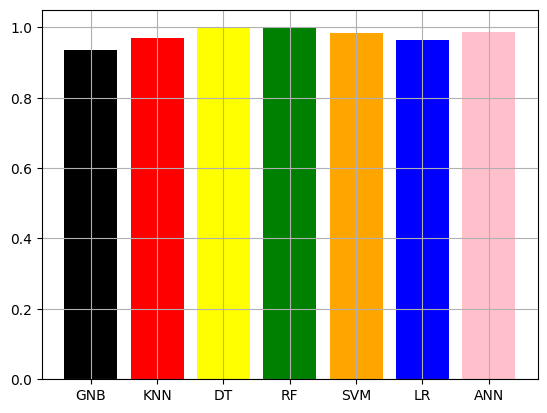

In [27]:
acc_train = [acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title  = ['GNB','KNN','DT','RF','SVM','LR','ANN']

colors =['black','red','yellow','green','orange','blue','pink']
plt.bar(title,acc_train,color= colors)
plt.grid()
plt.show()

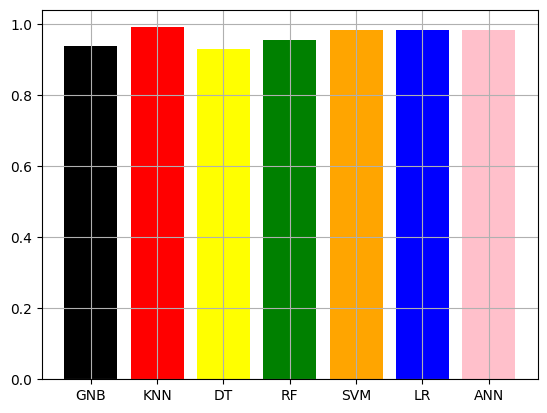

In [28]:
acc_test = [acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title  = ['GNB','KNN','DT','RF','SVM','LR','ANN']

colors =['black','red','yellow','green','orange','blue','pink']
plt.bar(title,acc_test,color= colors)
plt.grid()
plt.show()

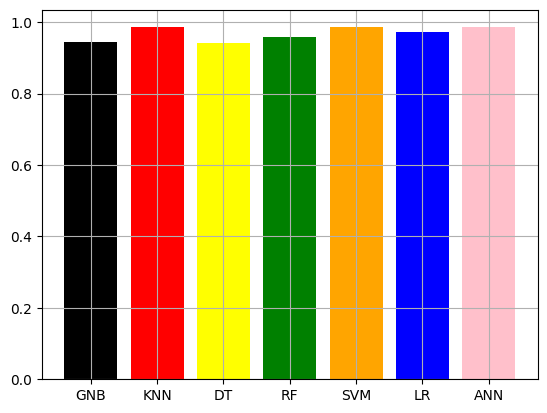

In [29]:
p = [p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]
title  = ['GNB','KNN','DT','RF','SVM','LR','ANN']

colors =['black','red','yellow','green','orange','blue','pink']
plt.bar(title,p,color= colors)
plt.grid()
plt.show()

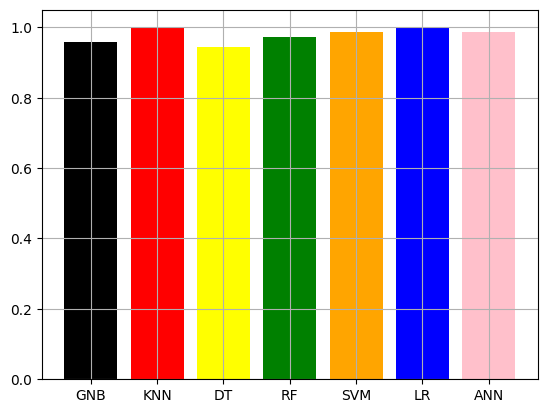

In [30]:
r = [r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]
title  = ['GNB','KNN','DT','RF','SVM','LR','ANN']

colors =['black','red','yellow','green','orange','blue','pink']
plt.bar(title,r,color= colors)
plt.grid()
plt.show()